In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#import warnings
#warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv("ACME-HappinessSurvey2020.csv")
df.describe(include='all')

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Data Description:

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer. 
	
		Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers (Target Variable - Happiness Index)
		X1 = my order was delivered on time  (Delivery Time) 
		X2 = contents of my order was as I expected (Product Quality)
		X3 = I ordered everything I wanted to order (Product Availability)
		X4 = I paid a good price for my order (Order Pricing)
		X5 = I am satisfied with my courier (Courier Feedback)
        X6 = the app makes ordering easy for me (Application Feedback)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


Observations:

The dataset does not contain any null values and outliers.


In [4]:
len(df.drop_duplicates())

110

Observations:

There are 16 duplicates present in the dataset which need to be removed.

In [5]:
df.drop_duplicates(inplace = True)
df.reset_index(drop= True, inplace = True)
df

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,1,5,5,3,5,5,5
...,...,...,...,...,...,...,...
105,0,4,4,4,4,1,3
106,1,5,2,3,4,4,3
107,1,5,2,3,4,2,5
108,0,4,3,3,4,4,5


# EDA

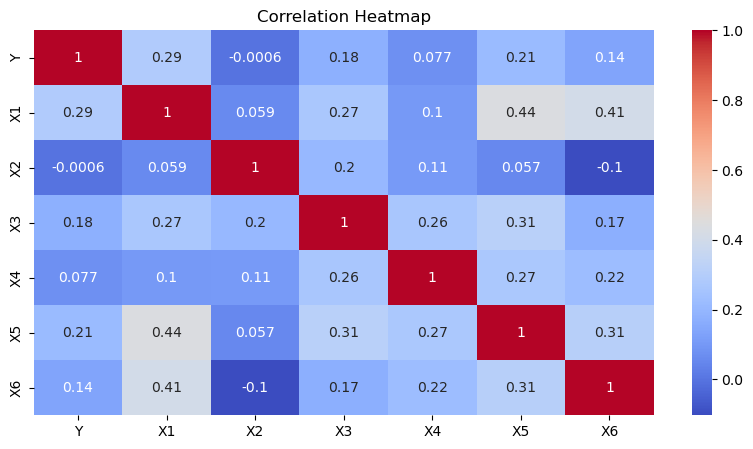

In [6]:
#checking correlation strengh
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap="coolwarm" , annot = True )
plt.title("Correlation Heatmap")
plt.show()

X1 (Delivery time) and X5 (Courier feedback) shows a stronger correlation in comparison to the remaining features.

X2 (Product Quality) and X4 (Order pricing) shows the least correlation for predicting customer satisfaction.


Multivariate: 

Correlation between Y and other Attributes:

	• The highest positive correlation with the target variable Y is observed for X1 (Delivery Time) with a correlation coefficient of 0.286.
	• X5 (Courier Feedback) and X6 (Application Feedback) also show low positive correlations with the target Y, with coefficients of 0.213 and 0.137 respectively.
	• Among the attributes, X2 (Product Quality) has the lowest negative correlation (close to zero) with the target Y.
    • The other attributes (X3, X4) also show low positive correlations with the target.
    
    
Correlation between Attributes Themselves:

	• There is a moderate positive correlation between X1 (Delivery Time) and X6 (Application Feedback), suggesting that customers who rate delivery time positively are likely to find the app easy to use for ordering.
	• X1 (Delivery Time) has a negligible positive correlation with X2 (Product Quality) and X4 (Order Pricing), indicating that customers satisfied with delivery time might also perceive better product quality and pricing.
	• X2 (Product Quality) and X5 (Courier Feedback) have a negligible positive correlation, suggesting that customers who are satisfied with product quality might also have positive feedback about couriers.
	• X4 (Order Pricing) and X5 (Courier Feedback) have a weak positive correlation, indicating that customers satisfied with pricing might also have positive feedback about couriers.
    •X4 (Order Pricing) and X6 (Application Feedback) have a weak positive correlation, suggesting that customers who consider pricing as good might also find the app easy to use.
    
    Note: Except for X1 and X2, the coorelation between the other attributes are extremely weak so their dependencies cannot be guaranteed.

<Figure size 700x700 with 0 Axes>

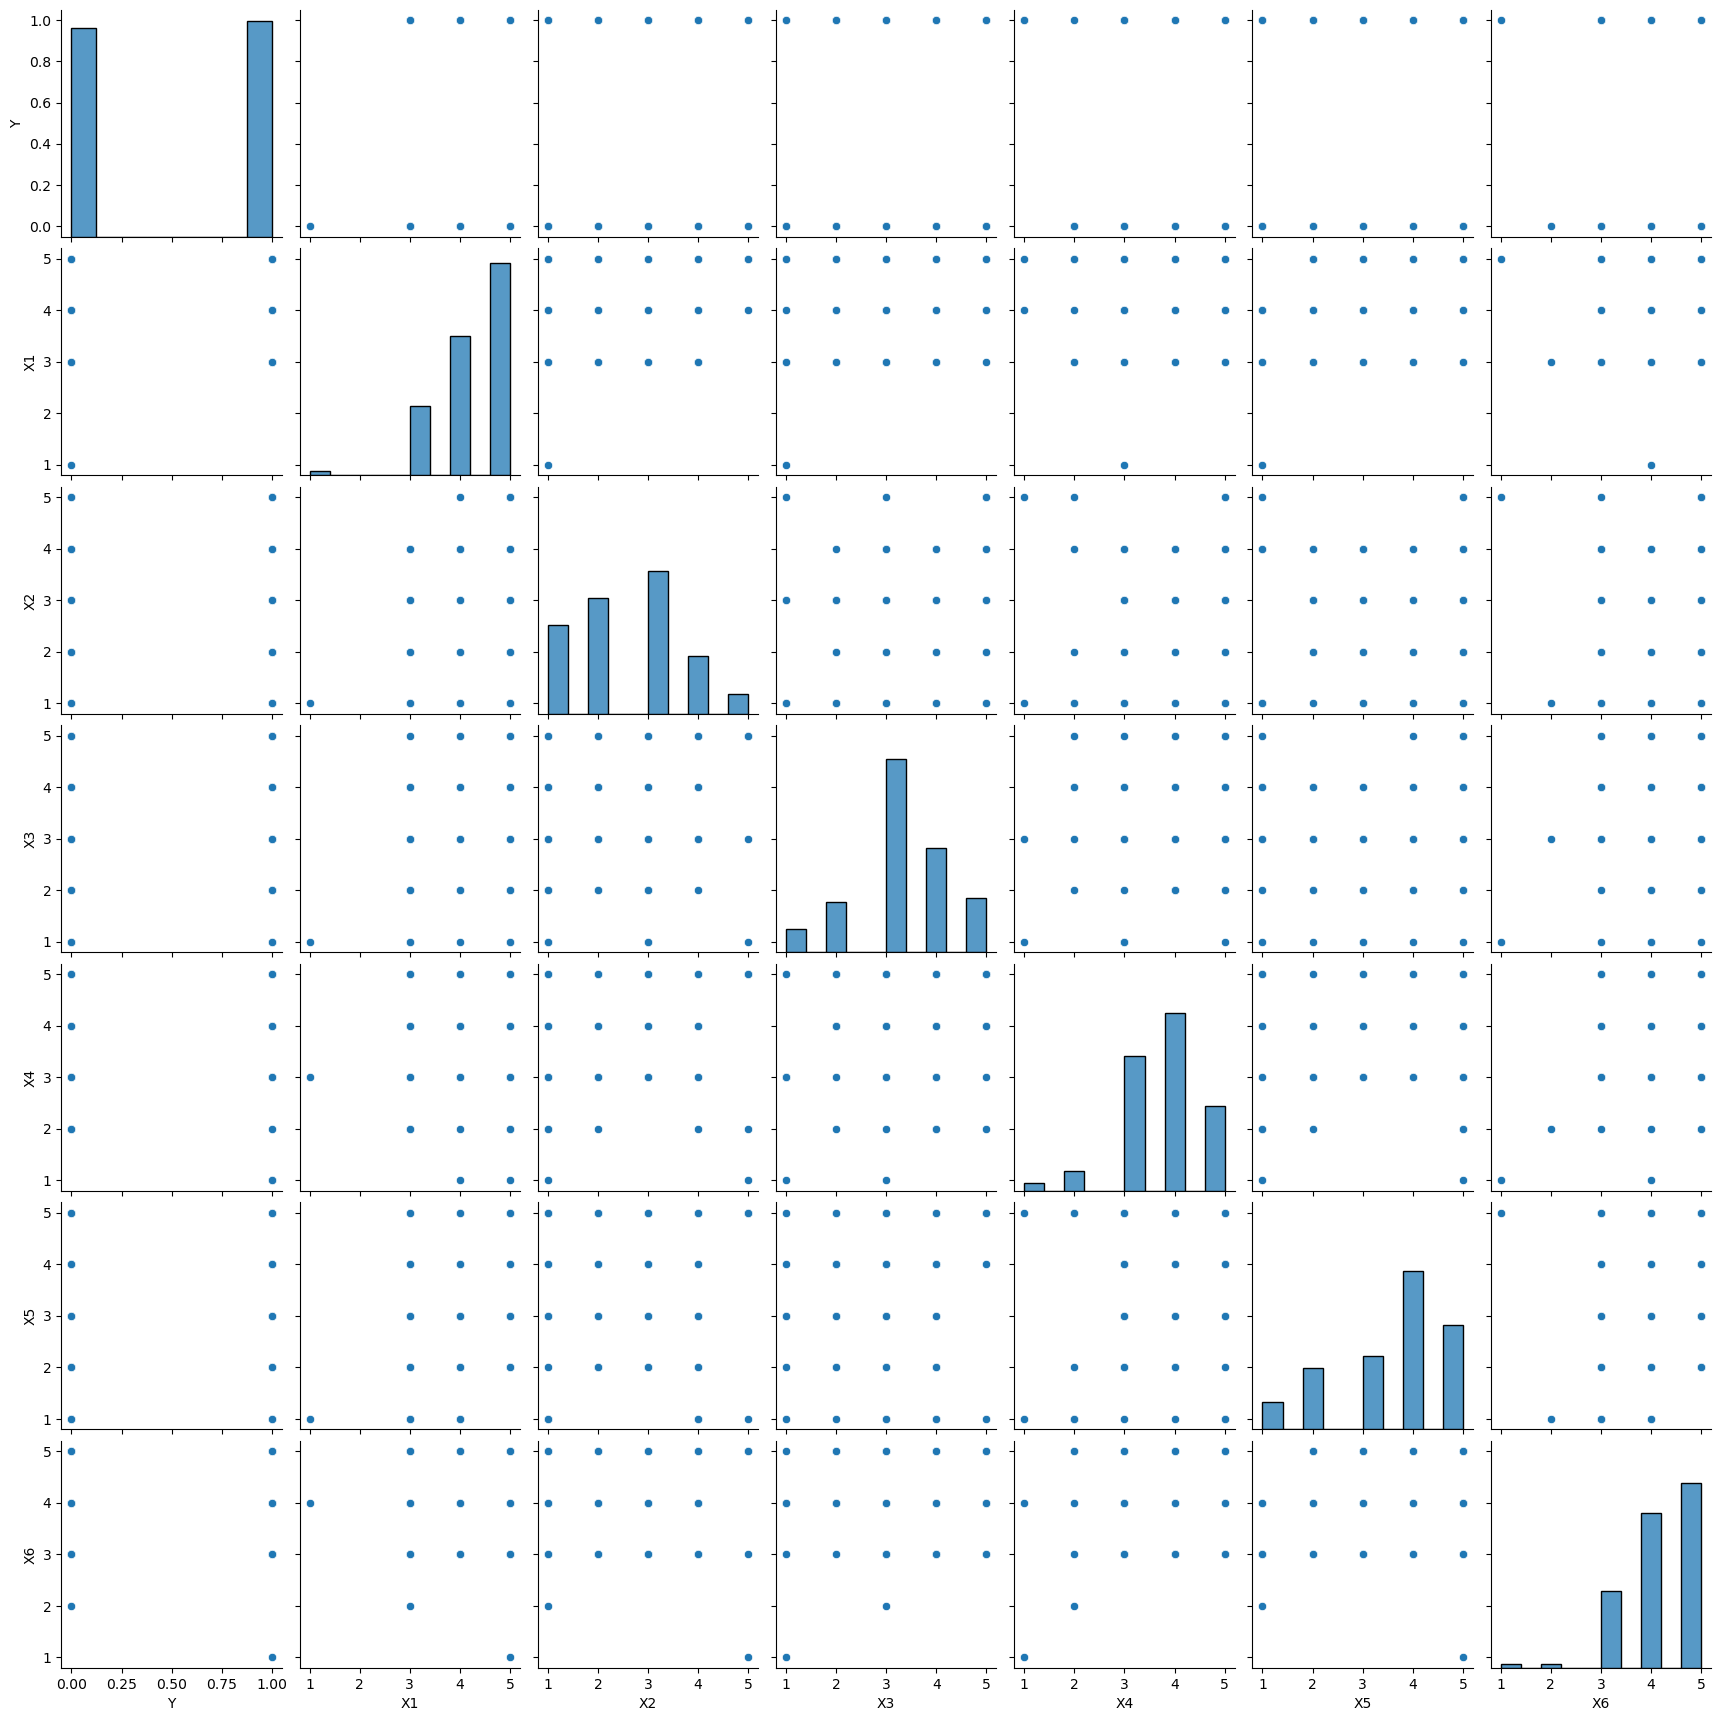

In [7]:
plt.figure(figsize=(7,7))
sns.pairplot(df)
plt.show()


In [8]:
y_value_count = df["Y"].value_counts()
X1_value_count = df["X1"].value_counts()
X2_value_count = df["X2"].value_counts()
X3_value_count = df["X3"].value_counts()
X4_value_count = df["X4"].value_counts()
X5_value_count = df["X5"].value_counts()
X6_value_count = df["X6"].value_counts()



print("\nValue counts of each value for X1:\n", X1_value_count )
print("\nValue counts of each value for X2:\n", X2_value_count )
print("\nValue counts of each value for X3:\n", X3_value_count )
print("\nValue counts of each value for X4:\n", X4_value_count )
print("\nValue counts of each value for X5:\n", X5_value_count )
print("\nValue counts of each value for X6:\n", X6_value_count )
print("\nValue counts of each value for Y:\n", y_value_count )



Value counts of each value for X1:
 5    55
4    36
3    18
1     1
Name: X1, dtype: int64

Value counts of each value for X2:
 3    37
2    30
1    23
4    15
5     5
Name: X2, dtype: int64

Value counts of each value for X3:
 3    50
4    27
5    14
2    13
1     6
Name: X3, dtype: int64

Value counts of each value for X4:
 4    46
3    35
5    22
2     5
1     2
Name: X4, dtype: int64

Value counts of each value for X5:
 4    41
5    27
3    19
2    16
1     7
Name: X5, dtype: int64

Value counts of each value for X6:
 5    48
4    40
3    20
2     1
1     1
Name: X6, dtype: int64

Value counts of each value for Y:
 1    56
0    54
Name: Y, dtype: int64


Pair plot Observation:
Univariate Analysis (histogram)
    1)Target Y: 50.9% (56) - happy; 49.1% (54) - unhappy;
    2)X1 (Delivery Time) : 82.7% (91) - happy; 16.4% (18) - neutral; 0.9% (1) - unhappy;
    3)X2 (Product Quality): 18.2% (20) - happy; 33.6% (37) - neutral; 48.2% (53) - unhappy;
    4)X3 (Product Availability): 37.2% (41) - happy; 45.5% (50) - neutral; 17.3% (19) - unhappy;
    5)X4 (Order Pricing): 61.8% (68) - happy; 31.8% (35) - neutral; 6.4% (7) - unhappy;
    6)X5 (Courier Feedback): 61.8% (68) - happy; 17.3% (19) - neutral; 20.9% (23)- unhappy;
    7)X6 (Application Feedback): 80% (88) - happy; 18.2% (20) - neutral; 1.8% (2)- unhappy;




Univariate Analysis:

	• The histograms on the diagonal of the pair plot provide insights into the distribution of each attribute.
	• The majority of customers (50.9%) are classified as happy (Y = 1), while 49.1% are classified as unhappy (Y = 0).
	
For individual attributes:

	• X1 (Delivery Time) has a higher proportion of happy customers (82.7%) compared to unhappy ones (0.9%).
	• X2 (Product Quality) has a more balanced distribution, with a relatively small proportion of happy customers (18.2%) compared to the neutral (33.6%) and unhappy (48.2%) categories.
	• X3 (Product Availability) shows higher proportion of happy customers (37.2%) and relatively low unhappy, but majority are having a neutral experiance.
	• X4 (Order Pricing) has a higher proportion of happy customers (61.8%) and a relatively low proportion of unhappy customers (6.4%).
	• X5 (Courier Feedback) has a higher proportion of happy customers (61.8%) and a moderate proportion of unhappy customers (20.9%).
    • X6 (Application Feedback) is skewed towards happy customers (80%) with only 1.8% being unhappy![image.png](attachment:image.png)

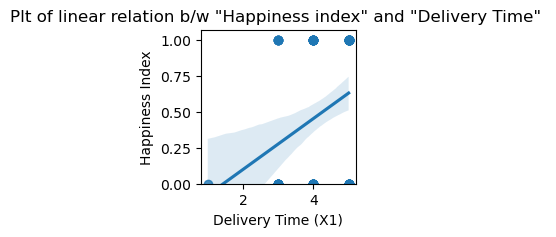

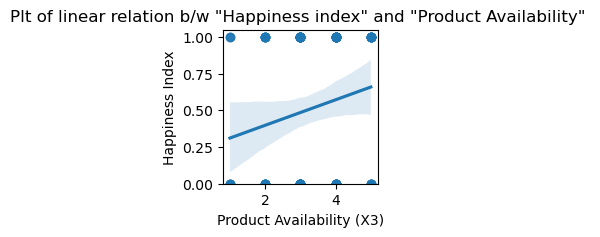

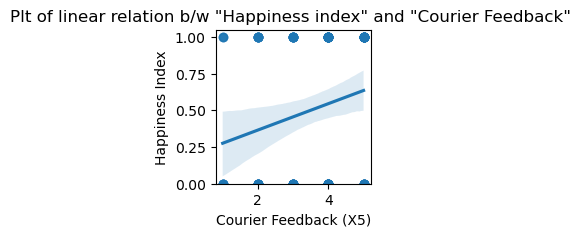

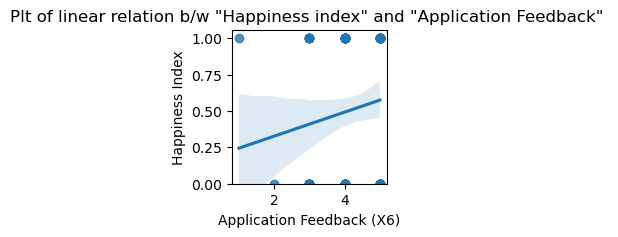

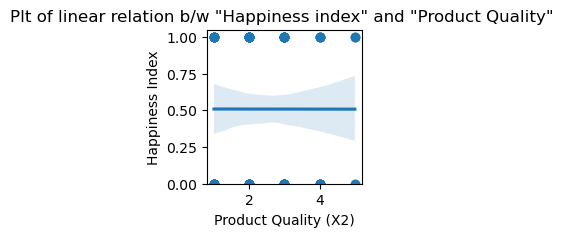

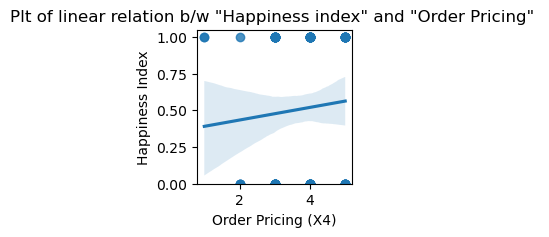

In [9]:
plt.figure(figsize=(2,2))
sns.regplot(x="X1",y="Y", data=df)
plt.ylim(0,)
plt.xlabel('Delivery Time (X1)')
plt.ylabel('Happiness Index')
plt.title('Plt of linear relation b/w "Happiness index" and "Delivery Time" ')
plt.show()

plt.figure(figsize=(2,2))
sns.regplot(x="X3",y="Y", data=df)
plt.ylim(0,)
plt.xlabel('Product Availability (X3)')
plt.ylabel('Happiness Index')
plt.title('Plt of linear relation b/w "Happiness index" and "Product Availability" ')
plt.show()

plt.figure(figsize=(2,2))
sns.regplot(x="X5",y="Y", data=df)
plt.ylim(0,)
plt.xlabel('Courier Feedback (X5)')
plt.ylabel('Happiness Index')
plt.title('Plt of linear relation b/w "Happiness index" and "Courier Feedback" ')
plt.show()

plt.figure(figsize=(2,2))
sns.regplot(x="X6",y="Y", data=df)
plt.ylim(0,)
plt.xlabel('Application Feedback (X6)')
plt.ylabel('Happiness Index')
plt.title('Plt of linear relation b/w "Happiness index" and "Application Feedback" ')
plt.show()

plt.figure(figsize=(2,2))
sns.regplot(x="X2",y="Y", data=df)
plt.ylim(0,)
plt.xlabel('Product Quality (X2)')
plt.ylabel('Happiness Index')
plt.title('Plt of linear relation b/w "Happiness index" and "Product Quality" ')
plt.show()

plt.figure(figsize=(2,2))
sns.regplot(x="X4",y="Y", data=df)
plt.ylim(0,)
plt.xlabel('Order Pricing (X4)')
plt.ylabel('Happiness Index')
plt.title('Plt of linear relation b/w "Happiness index" and "Order Pricing" ')
plt.show()

Bivariate Analysis Observation: Attributes against Target

X1 demonstrates the highest positive linear correlation to Y as compared to the other features. On the other hand, X3, X5, and X6 exhibit positive correlations, albeit weaker when compared to the X1 feature. There are few outliers observed in all the features that doesnt fit the linear relatiosnship. 

X2 and X4 exhibit the least correlation, potentially making them inadequate for predicting the target variable.

EDA Conclusion:
    
X1 (Delivery Time),X4 (Order pricing), X5 (Courier Feedback), and X6 (Application Feedback) are the most positively correlated attributes with the target Y. These attributes may play a significant role in predicting customer happiness.

X2 (Product Quality) has the lowest correlation with the target Y, implying that it might have less impact on customer happiness prediction. However X2 (Product Quality) and X4 (Order Pricing) are attributes that might have a significant impact on predicting customer being unhappy, X2 (Product Quality) has a relatively high proportion of unhappy customers (48.2%) compared to happy customers (18.2%).

The distribution of each attribute provides insights into the varying importance of features. For instance, X1 (Delivery Time) seems to have a higher impact on happiness compared to others.

Further analysis, such as feature importance through machine learning models, can help validate the relative importance of each attribute in predicting customer happiness accurately.

# Model Evaluation

In [57]:
y = df["Y"].values.reshape(-1,1)
X= df.drop(["Y"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0 )

In [74]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
xgb = XGBClassifier()
lgbm = LGBMClassifier(verbose = -1)
svm = SVC()




In [116]:
model = [svm]
models = [lr,knn,dt,rf,nb,svm,xgb,lgbm]

def model_training(model):
    for i in model:
        i.fit(X_train,y_train)
        i.pred = i.predict(X_test)
        print("\nSelected Model :",i)
        print(i,"Model training Accuracy : ", i.score(X_train,y_train)*100)
        print(i,"Model testing Accuracy : ", accuracy_score(y_test,i.pred)*100)
        print(i,"f1_score:", f1_score(y_test,i.pred))
        print("\n\n")

model_training(models)


Selected Model : LogisticRegression()
LogisticRegression() Model training Accuracy :  61.36363636363637
LogisticRegression() Model testing Accuracy :  54.54545454545454
LogisticRegression() f1_score: 0.6153846153846154




Selected Model : KNeighborsClassifier()
KNeighborsClassifier() Model training Accuracy :  75.0
KNeighborsClassifier() Model testing Accuracy :  63.63636363636363
KNeighborsClassifier() f1_score: 0.6666666666666666




Selected Model : DecisionTreeClassifier()
DecisionTreeClassifier() Model training Accuracy :  93.18181818181817
DecisionTreeClassifier() Model testing Accuracy :  50.0
DecisionTreeClassifier() f1_score: 0.47619047619047616




Selected Model : RandomForestClassifier(max_features=5)
RandomForestClassifier(max_features=5) Model training Accuracy :  93.18181818181817
RandomForestClassifier(max_features=5) Model testing Accuracy :  50.0
RandomForestClassifier(max_features=5) f1_score: 0.47619047619047616




Selected Model : GaussianNB()
GaussianNB() Model

Observation: 

Currently, both K-Nearest Neighbors (knn) and LightGBM (lgbm) are temporarily selected as they attained an accuracy of 77.2%, which outperforms the other models.

The accuracy of the knn model has significantly improved from 50% to 77.2% after dropping features X2 and X4, which exhibited the lowest correlation to Y. In contrast, the accuracy of the lgbm model remained unchanged throughout this.

At present, the knn and lgbm classifiers gives an accuracy of 77.2%, but this is only accomplished for a test size of 20% and a random_state value of 100. To ensure consistent and reliable accuracy, further tuning of the models is necessary.

To do:
    1) Detailed exploration of parameter tuning for knn and lgbm models.
    2) Explore alternative models to identify the most suitable one for this dataset.
  

Concerns:
    1) The standard procedures to enhance accuracy need to be clarified.
    2) The potential for overfitting while utilizing the knn model should be addressed.
    3) Removing the outliers spotted in regplot.
    4) Are the warnings in lgbm because of the missing hyperparameter tuning, how does that affect the accuracy.
    5) Need for feature scaling, although the numbers are between 1 to 5.

In [70]:
#finding the k value
import math
math.sqrt(len(y_test))

4.69041575982343

In [40]:
knn_temp = KNeighborsClassifier(n_neighbors = 5, p=2, metric="euclidean")
knn_temp.fit(X_train,y_train)
knn_temp.pred = knn.predict(X_test)
print("knn improved model training Accuracy : ", knn_temp.score(X_train,y_train)*100)
print("knn improved Model testing Accuracy : ", accuracy_score(y_test,knn_temp.pred)*100)
cm = confusion_matrix(y_test,knn_temp.pred)
print(cm)
print(f1_score(y_test,knn_temp.pred))

knn improved model training Accuracy :  75.0
knn improved Model testing Accuracy :  63.63636363636363
[[6 6]
 [2 8]]
0.6666666666666666


Observation:

knn model training accuracy seem to have improved a little.

# Cross Validation

In [71]:
#Cross Validation using cross_val_score

def get_score(models,folds,rs):
    
    
    kf = KFold(n_splits=folds,shuffle = True,random_state = rs)
    skf = StratifiedKFold(n_splits=folds,shuffle = True, random_state = rs)

    for selected_model in models:
        Accuracy_vals = cross_val_score(selected_model,X,y,cv = skf)
        print("\nModel: ",selected_model)
        print("\nAll scores", Accuracy_vals)
        print("Minumun Accuracy:", min(Accuracy_vals)*100)
        print("Maimum Accuracy:", max(Accuracy_vals)*100)
        print("Average Accuracy:", np.mean(Accuracy_vals)*100,"\n")

In [75]:
#cross validation using kf/skf (manual)

def custom_get_score(models,folds,rs):
    
    kf_c = KFold(n_splits=folds, shuffle = True, random_state = rs )
    skf_c = StratifiedKFold(n_splits=folds,shuffle = True, random_state = rs)
                                                                                                     
    for selected_model in models:
        scores = []
        for train_index, test_index in kf_c.split(df):
            X_train_c, X_test_c, y_train_c, y_test_c = X.iloc[train_index], X.iloc[test_index], y[train_index], y[test_index]
            selected_model.fit(X_train_c, y_train_c)
            scores.append(selected_model.score(X_test_c, y_test_c))
        print("\nModel: ",selected_model)
        print("\nAll scores", scores)
        print("Minumun Accuracy:", min(scores)*100)
        print("Maimum Accuracy:", max(scores)*100)
        print("Average Accuracy:", np.mean(scores)*100,"\n")   

In [76]:
get_score(models, 10, 0) #currently using skf


Model:  LogisticRegression()

All scores [0.54545455 0.36363636 0.45454545 0.36363636 0.54545455 0.81818182
 0.63636364 0.45454545 0.45454545 0.72727273]
Minumun Accuracy: 36.36363636363637
Maimum Accuracy: 81.81818181818183
Average Accuracy: 53.63636363636364 


Model:  KNeighborsClassifier()

All scores [0.72727273 0.45454545 0.54545455 0.36363636 0.45454545 0.81818182
 0.18181818 0.27272727 0.72727273 0.27272727]
Minumun Accuracy: 18.181818181818183
Maimum Accuracy: 81.81818181818183
Average Accuracy: 48.18181818181818 


Model:  DecisionTreeClassifier()

All scores [0.45454545 0.63636364 0.27272727 0.54545455 0.27272727 0.81818182
 0.09090909 0.45454545 0.45454545 0.36363636]
Minumun Accuracy: 9.090909090909092
Maimum Accuracy: 81.81818181818183
Average Accuracy: 43.63636363636363 


Model:  RandomForestClassifier()

All scores [0.63636364 0.27272727 0.54545455 0.27272727 0.27272727 0.72727273
 0.45454545 0.45454545 0.45454545 0.45454545]
Minumun Accuracy: 27.27272727272727
Maimum

In [77]:
custom_get_score(models, 10, 0) #currently using kf


Model:  LogisticRegression()

All scores [0.5454545454545454, 0.36363636363636365, 0.5454545454545454, 0.6363636363636364, 0.5454545454545454, 0.5454545454545454, 0.6363636363636364, 0.36363636363636365, 0.45454545454545453, 0.6363636363636364]
Minumun Accuracy: 36.36363636363637
Maimum Accuracy: 63.63636363636363
Average Accuracy: 52.72727272727272 


Model:  KNeighborsClassifier()

All scores [0.45454545454545453, 0.5454545454545454, 0.7272727272727273, 0.7272727272727273, 0.36363636363636365, 0.45454545454545453, 0.5454545454545454, 0.18181818181818182, 0.5454545454545454, 0.7272727272727273]
Minumun Accuracy: 18.181818181818183
Maimum Accuracy: 72.72727272727273
Average Accuracy: 52.72727272727272 


Model:  DecisionTreeClassifier()

All scores [0.2727272727272727, 0.36363636363636365, 0.45454545454545453, 0.7272727272727273, 0.18181818181818182, 0.2727272727272727, 0.18181818181818182, 0.18181818181818182, 0.45454545454545453, 0.6363636363636364]
Minumun Accuracy: 18.181818181818

# Cross Validation with Parameter Tuning 

lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
xgb = XGBClassifier()
lgbm = LGBMClassifier()
svm = SVC()

In [ ]:
rs = arange(0,101,1)
folds =10

xgb = XGBClassifier()
svm = SVC()
rf = RandomForestClassifier()

kf = KFold(n_splits=folds,shuffle = True,random_state = rs)
skf = StratifiedKFold(n_splits=folds,shuffle = True, random_state = rs)

In [ ]:
#parameter tuning and gs on svm
svm = SVC()

parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear'], 'random_state' : rs},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'],'random_state' : rs, 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
]


gs = GridSearchCV(estimator = svm, 
                  param_grid = parameters, 
                  scoring = "accuracy", 
                  refit = "accuracy",  
                  cv = skf,
                  verbose = -1)

gs =gs.fit(X_train, y_train)
print("\nAll details of best model:",gs.best_estimator_) #for all details of the best model
print("\nBest parameter values:",gs.best_params_) # to get only the best hpara value that we searched for
print("Best score using best para:",gs.best_score_) # best score
select_para = gs.best_params

In [111]:
svm = SVC(C=1, kernel='linear', random_state=rs)

model_training(model)


Selected Model : SVC(C=1, kernel='linear', random_state=0)
SVC(C=1, kernel='linear', random_state=0) Model training Accuracy :  61.36363636363637
SVC(C=1, kernel='linear', random_state=0) Model testing Accuracy :  50.0
SVC(C=1, kernel='linear', random_state=0) f1_score: 0.5925925925925927





In [ ]:
#parameter tuning and gs on rf

parameters = {
    'n_estimators': np.arange(10,501,10),
    'max_features': ["auto", "sqrt", "log2", 0.5, 0.7,1,2,3,4,5]
}


gs = GridSearchCV(estimator = rf, 
                  param_grid = parameters, 
                  scoring = "accuracy", 
                  refit = "accuracy",  
                  cv = skf,
                  verbose = -1)

gs =gs.fit(X_train, y_train)
print("\nAll details of best model:",gs.best_estimator_) #for all details of the best model
print("\nBest parameter values:",gs.best_params_) # to get only the best hpara value that we searched for
print("Best score using best para:",gs.best_score_) # best score